# Rent price in Barcelona 2014 - 2022
### A compilation of prices for rent in Barcelona Spain

# About Dataset
This dataset includes data on price for rent in Barcelona, Spain. The data was collected for a period of 2014 - 2022 years, divided into trimesters.The prices go by neighbourhoods and districts.This dataset includes both prices per month and prices per square meter, so that you can easier compare them.

https://www.kaggle.com/datasets/marshuu/rent-price-in-barcelona-2014-2022

In [1]:
# Importing the relevant Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# The below code removes all the warnings during execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data from Kaggle 
df = pd.read_csv("data.csv")

In [3]:
# Checking out the data 
df.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


In [4]:
# Checking the categorical unique values in "Year"
df["Year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [5]:
# Checking the categorical unique values in "Trimester"
df["Trimester"].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
# Checking the categorical unique values in "District"
df["District"].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuic', 'Les Corts',
       'Sarria-Sant Gervasi', 'Gracia', 'Horta-Guinardo', 'Nou Barris',
       'Sant Andreu', 'Sant Marti'], dtype=object)

In [7]:
# Checking the categorical unique values in "Average _rent"
df["Average _rent"].unique()

array(['average rent (euro/month)', 'average rent per surface (euro/m2)'],
      dtype=object)

In [8]:
# Checking the categorical unique values in "Neighbourhood"
df["Neighbourhood"].unique()

array(['el Raval', 'Gothic Quarter', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'Fort Pienc',
       'Sagrada Familia', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina de Port', 'la Font de la Guatlla', 'Hostafrancs',
       'la Bordeta', 'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarria',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farro',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gracia', "el Camp d'en Grassot i Gracia Nova",
       'el Baix Guinardo', 'Can Baro', 'el Guinardo',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genis dels Agudells', 'Montbau', "la Vall d'Hebron", 'Horta',
       'Vilapicina i la Torre Llobeta', 'Porta', 'el T

In [9]:
# Checking if there are any null values 
# None are found!
df.isnull().sum()

Year             0
Trimester        0
District         0
Neighbourhood    0
Average _rent    0
Price            0
dtype: int64

In [10]:
df.describe()

,Year,Trimester,Price
count,4622.000000,4622.000000,4622.000000
mean,2017.745565,2.440502,416.457594
std,2.462828,1.116377,442.872305
min,2014.000000,1.000000,3.180000
25%,2016.000000,1.000000,12.100000
50%,2018.000000,2.000000,81.820000
75%,2020.000000,3.000000,777.207500
max,2022.000000,4.000000,2034.000000


In [11]:
# Categorical values must be encoded to some constant numerical value 
## Simple technique is to use the map function 

## list(df["District"].unique()) -> gives the list of unique values 
## A list has index and element when enumerated. 
## The index itself is used as the numerical encoding. 

## Sorting helps it easier to find the code that corresponds to an element. 
## Consider using that for custom inputs 

# Encoding District 
df["District"] = df["District"].map({ele: index for index, ele in enumerate(list(df["District"].unique()))})

# Encoding Neighbourhood
df["Neighbourhood"] = df["Neighbourhood"].map({ele: index for index, ele in enumerate(list(df["Neighbourhood"].unique()))})

# Average _rent
df["Average _rent"] = df["Average _rent"].map({ele: index for index, ele in enumerate(list(df["Average _rent"].unique()))})

In [12]:
# Checking the dataframe after encoding 
df.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,0,0,0,589.55
1,2014,1,0,1,0,712.79
2,2014,1,0,2,0,540.71
3,2014,1,0,3,0,673.44
4,2014,1,1,4,0,736.09


In [13]:
# Cross - verifying 
df.isnull().sum()

Year             0
Trimester        0
District         0
Neighbourhood    0
Average _rent    0
Price            0
dtype: int64

In [14]:
# Checking if the encoded values are numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4622 non-null   int64  
 1   Trimester      4622 non-null   int64  
 2   District       4622 non-null   int64  
 3   Neighbourhood  4622 non-null   int64  
 4   Average _rent  4622 non-null   int64  
 5   Price          4622 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 216.8 KB


In [15]:
# Creating the train test split 
# Usual rule: 80-20

# Importing the relevant library 
from sklearn.model_selection import train_test_split

# Features (x) and Label (y)
x = df.drop(columns = "Price", axis = 1)
y = df["Price"]

# The split (train - test )
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Feature Importance Plot 

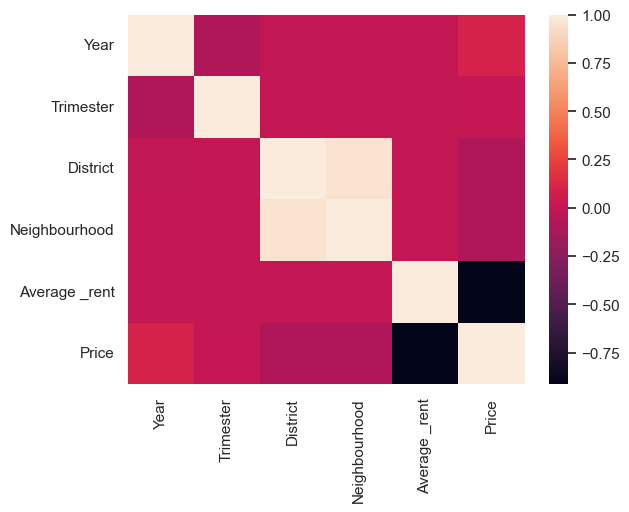

In [18]:
tc = df.corr()
val = sns.heatmap(tc)
fig = val.get_figure()
fig.savefig("out.png") 

# Evaluation Metrics - Preprepared 

In [19]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_test, y_test)}
    return scores

# About Random Forest Regressor 

## Documentation Link 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# ML Model - Random Forest Regressor 

Created and tested 3 models with different criterion. They are 
1. absolute error 
2. poisson 
3. squared error 

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(
                    n_jobs=-1,
                    n_estimators = 500, 
                    criterion = "absolute_error", 
                    max_samples = 3000
                    )
model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_samples=3000,
                      n_estimators=500, n_jobs=-1)

In [22]:
metrics = show_scores(model)
metrics

{'Training MAE': 9.315264322423607,
 'Valid MAE': 23.643015156756796,
 'Training RMSLE': 0.036873387042458856,
 'Valid RMSLE': 0.09438505215589234,
 'Training R^2': 0.9978388548526588,
 'Valid R^2': 0.9818971056133132}

In [23]:
with open("metrics.txt", 'w') as outfile:
    for key in metrics:
        val = metrics[key]
        text = key + " : " + str(val)
        outfile.write(text)
        outfile.write("\n")

# Model Successfully Created ✨

# Upvote this if you find useful!